# Домашнее задание 1

Это домашнее задание по материалам первого семинаров. Дедлайн по отправке - 23:55 10 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_1

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__(а)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

Перепишем $f(x)$:

$$f(x) = \frac{1}{2} \left<x, Ax \right> - \left<b, x \right>$$

Найдем $\nabla f(x)$:

$$df(x) = \frac{1}{2} \left<x, Adx \right> + \frac{1}{2} \left<Ax, dx \right> - \left<b, dx \right> = \left<\frac{1}{2}A^Tx + \frac{1}{2}Ax - b, dx \right>$$

$$\nabla f(x) = \frac{1}{2} \left(A + A^T \right)x - b$$

Найдем $\nabla^2 f(x)$:

$$d^2f(x) = \left<\frac{1}{2} \left(A^T + A \right)dx_1, dx_2 \right>$$
    
$$\nabla^2 f(x) = \frac{1}{2}\left(A + A^T \right)$$

Тогда $f(x)$:
1. Выпукла, если:

$$\frac{1}{2} \left(A + A^T \right) \succeq 0$$

2. Сильно выпукла, если:

$$\frac{1}{2} \left(A + A^T \right) \succeq \mu I$$

__(б)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

Определим константу сильной выпуклости $\mu$. Из пункта __(а)__: 

$$\frac{1}{2} \left(A + A^T \right) - \mu I \succeq 0$$

Разложим $A + A^T$:

$$\frac{1}{2} \left(Q \Lambda Q^T \right) - \mu Q I Q^T \succeq 0$$

$$Q \left( \frac{1}{2} \Lambda - \mu I \right) Q^T \succeq 0$$

Матрица положительно полуопределена тогда и только тогда, когда все собственные числа неотрицательные, то есть:

$$\frac{1}{2} \lambda_{min} - \mu = 0 \Rightarrow \mu = \frac{1}{2} \lambda_{min} (A + A^T)$$

Определим константу Липшица градиента. По опредеделению:

$$\forall x_0, x_1 \in \mathbb{R}^d \hookrightarrow \| \nabla f(x_0) - \nabla f(x_1) \|_2 \leq L \| x_0 - x_1 \|_2$$

В пункте __(а)__ мы получили выражение для градиента:

$$\nabla f(x) = \frac{1}{2} \left(A + A^T \right)x - b$$

Тогда получим:

$$\left\| \frac{1}{2} \left(A + A^T \right) (x_0 - x_1) \right\|_2 \leq L \| x_0 - x_1 \|_2$$

$$\left\| \frac{1}{2} \left(A + A^T \right) (x_0 - x_1) \right\|_2 \leq \frac{1}{2} \left\| A + A^T \right\|_2 \| (x_0 - x_1) \|_2$$

То есть можно взять L:

$$L = \frac{1}{2} \left\| A + A^T \right\|_2 = \frac{1}{2} \lambda_{max}\left(A + A^T \right)$$

In [13]:
import numpy as np
from matplotlib import pylab as plt

## Задача 2

Продолжаем работать с задачей оптимизации из предыдущей задачи.

__(а)__ Придумайте (или найдите) способ генерации матрицы $А$, так чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$.

1. Будем генерировать симметричную диагональную матрицу, элементы которой будут лежат в диапазоне $[\mu, L]$, причем первое число равно $L$, а последнее равно $\mu$, при этом:

$$\mu = \lambda_{min} \left(A \right) = \mu \text{ и } L = \lambda_{max} \left(A \right) = L$$

In [14]:
#Генерация диагональной матрицы
def gen_matrix_diag(d, mu, L, s):
    np.random.seed(s)
    diag = mu + (L - mu) * np.random.sample(d)
    A = np.diag(diag)
    A[0][0] = L
    A[d - 1][d - 1] = mu
    return A

(Сначала реализовал генерацию диагональной матрицы, потом подумал, что диагональная матрица слишком частный случай, и что где-нибудь может получиться слишком хороший не показательный результат, поэтому решил реализовать генерацию не диагональной матрицы. Но после того, как я доделал задание, я проверил, и убедился в том, что можно было использовать диагональную матрицу)

Сгнерируем матрицу иначе. Сгенерируем рандомную матрицу, сделаем QR - разложение, возьмем из этого разложения ортогональную матрицу и с помощью этой матрицы и диагональной матрицы, полученной в предыдущем пункте, получим не диагональную матрицу $A = Q \Lambda Q^T$, удовлетворяющую поставленным условиям.

In [15]:
#Генерация матрицы
def gen_matrix(d, mu, L, s):
    np.random.seed(s)
    B = np.random.sample((d, d))
    Q, _ = np.linalg.qr(B)
    C = gen_matrix_diag(d, mu, L, s)
    A = Q @ C @ Q.T
    return A

__(б)__ Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше и произвольным вектором $b$ (лучше ненулевым). Желательно, уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы. 

In [16]:
#Целевая функция
def f(x):
    return 1/2 * x.T @ A @ x - b.T @ x

#Градиент функции 
def grad_f(x):
    return 1/2 * (A + A.T) @ x - b

crit - критерий сходимости:

0. crit = 0: $\left\| x^k - x^* \right\|_2^2$
1. crit = 1: $\left| f(x^k) - f(x^*)\right|$
2. crit = 2: $\left\| x^{k+1} - x^k \right\|_2^2$

In [22]:
#Градиентный спуск
def gradient_descent(grad_f, x_0, gamma, iteration, f, crit, x_sol=None, epsilon=10**-7):
    x_now = x_0
    errors = []
    for k in range(iteration):
        x_next = x_now - gamma * grad_f(x_now)
        if crit == 0:
            err = np.linalg.norm(x_now - x_sol, ord = 2)**2
        elif crit == 1:
            err = f(x_now) - f(x_sol)
        else:
            err = np.linalg.norm(x_next - x_now, ord = 2)**2
        x_now = x_next
        errors.append(err)
        if err < epsilon:
            break
    return x_now, errors

__(в)__ Для задачи с $d = 10$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^4$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x_0$ (если $b$ ненулевой, то можно взять нулевой $x_0$). Проверьте сходится ли он. В качестве критериев сходимости используйте $\| x_k - x^*\|^2$.

In [23]:
d = 10
mu = 1
L = 100
iteration = 10**4

s = 2
np.random.seed(s)
A = gen_matrix(d, mu, L, s)
b = np.random.sample(d) * 100
x_0 = np.random.sample(d) * 100

Так как функция сильно выпуклая, то для нахождения решения приравняем градиент к нулю, то есть:

$$\frac{1}{2} \left(A + A^T \right)x^* - b = 0$$

Так как $A$ мы взяли симметричную, то:

$$x^* = A^{-1}b$$

In [24]:
#Точное решение
x_np = np.linalg.inv(A) @ b
print('Решение numpy')
print(np.round(x_np, 3))
print(np.round(f(np.round(x_np, 3)), 3))

print()

#Моё решение
x_my, errors = gradient_descent(grad_f, x_0, 1./L, iteration, f, 0, x_np)

print('Мое решение')
print(np.round(x_my, 3))
print(np.round(f(np.round(x_my, 3)), 3))

print()

print('Ошибка')
print(np.round(errors[- 1], 13))

Решение numpy
[ 37.386   1.492  -0.809  17.557 -22.254   1.909  13.527  -9.68   -2.865
 -18.889]
-1657.543

Мое решение
[ 37.386   1.492  -0.809  17.557 -22.254   1.909  13.527  -9.68   -2.865
 -18.889]
-1657.543

Ошибка
9.90346e-08


__(г)__ Постройте график сходимости: по оси $x$ отложите номер итерации, по $y$ значения критерия на этой итерации. Поиграйтесь с осями, например, поставьте по $y$ логарифмический масштаб. Не забудьте подписать оси. Сделайте вывод о характере сходимости.

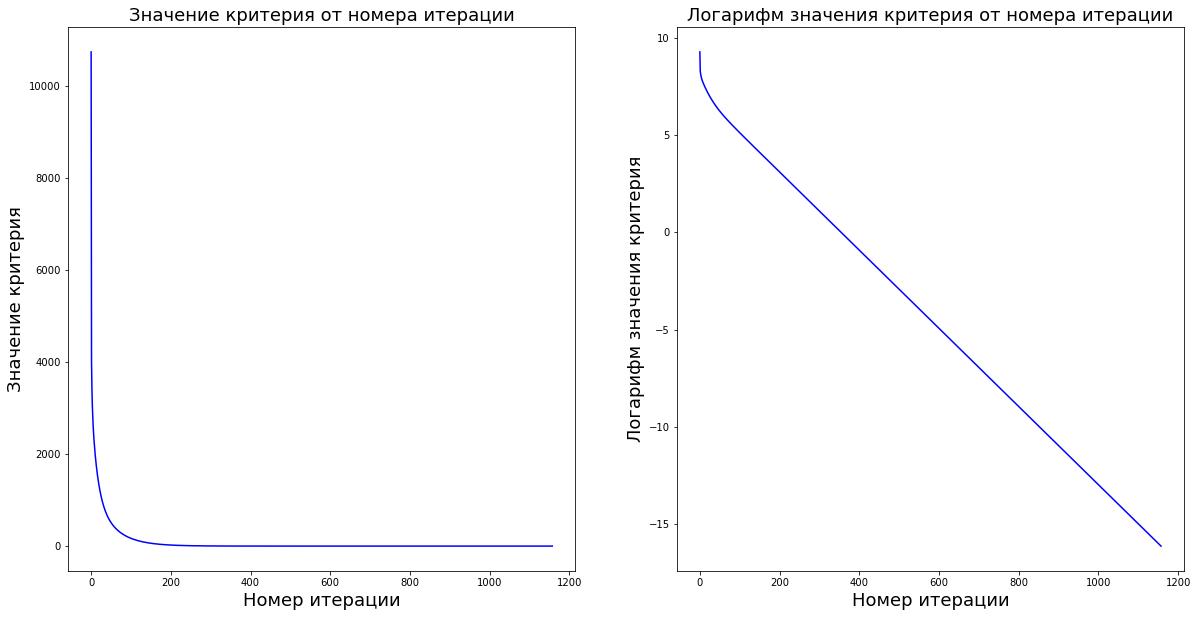

In [25]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
iterations = np.array(range(len(errors)))

ax[0].plot(iterations, errors, color = 'blue')
ax[0].set_title('Значение критерия от номера итерации', fontsize = 18)
ax[0].set_xlabel('Номер итерации', fontsize = 18)
ax[0].set_ylabel('Значение критерия', fontsize = 18)

ax[1].plot(iterations, np.log(errors), color = 'blue')
ax[1].set_title('Логарифм значения критерия от номера итерации', fontsize = 18)
ax[1].set_xlabel('Номер итерации', fontsize = 18)
ax[1].set_ylabel('Логарифм значения критерия', fontsize = 18)

plt.show()

Скорость схоимости нашего метода линейная.

__(д)__ Добавьте на график теоретическую сходимость, полученную на семинаре. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

На семинаре была получена зависимость:

$$\|x^k - x^*\|_2^2 \leq \left(1 - \frac{\mu}{L} \right)^k \|x^0 - x^*\|_2^2$$

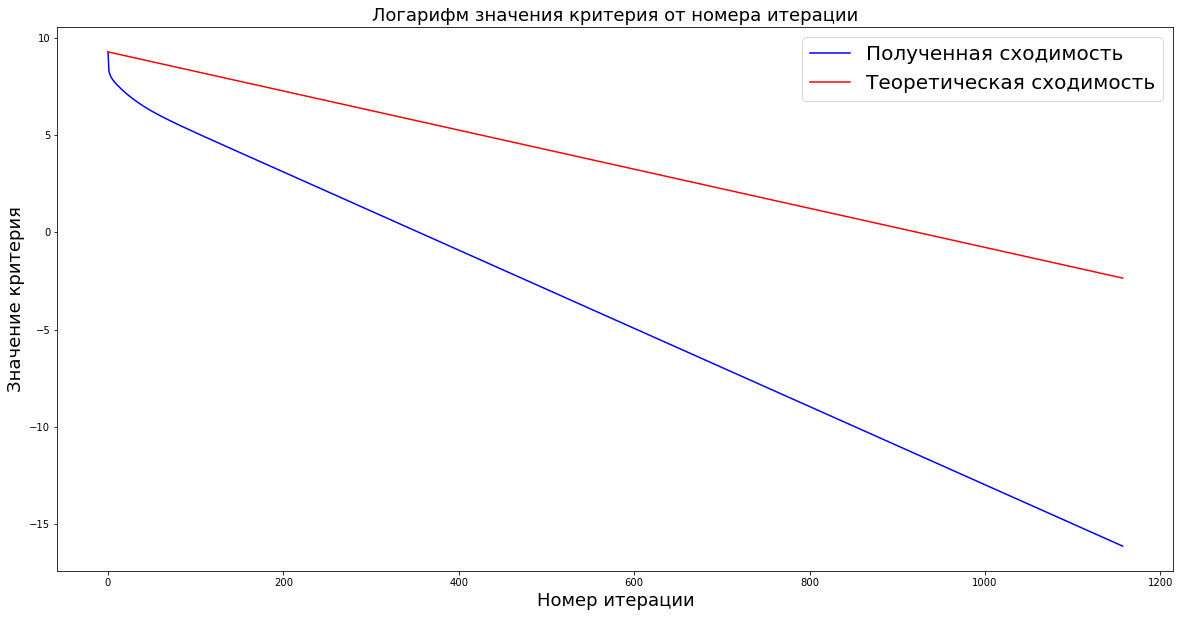

In [27]:
plt.figure(figsize = (20, 10))

plt.plot(iterations, np.log(errors), color = 'blue', label = 'Полученная сходимость')

C = np.linalg.norm(x_0 - x_np, ord = 2)**2
q = (1 - mu/L)
result = []
result.append(C)
for k in range(1, len(iterations)):
    result.append(result[k - 1] * q)

plt.plot(iterations, np.log(result), color = 'red', label = 'Теоретическая сходимость')

plt.title("Логарифм значения критерия от номера итерации", fontsize = 18)
plt.xlabel("Номер итерации", fontsize = 18)
plt.ylabel("Значение критерия", fontsize = 18)

plt.legend(fontsize = 20)
plt.show()

Полученная сходимость получилась меньше теоретической, а прямые получились почти параллельными.

__(e)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Уменьшайте и увеличивайте шаг. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). 

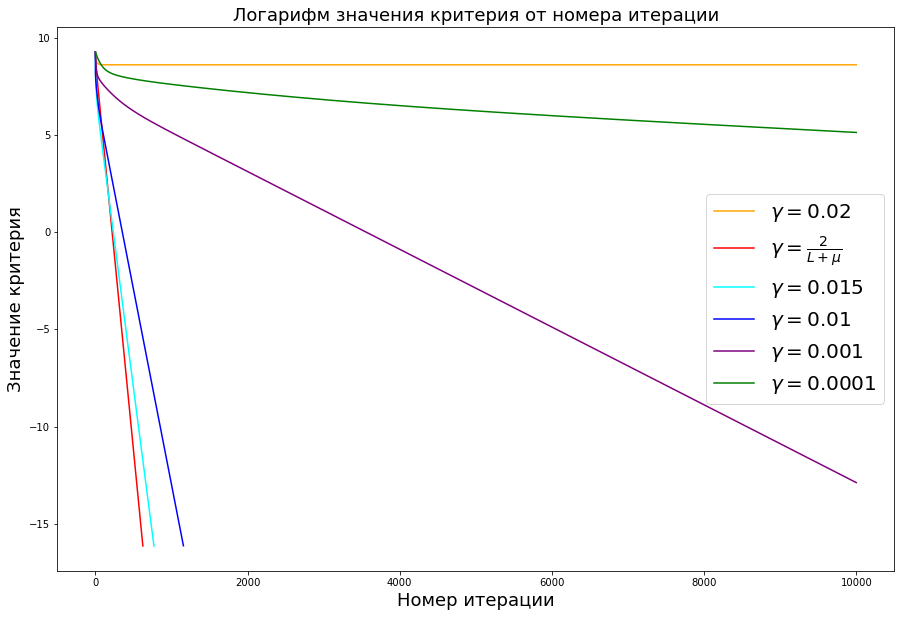

In [753]:
plt.figure(figsize = (15, 10))

x_my, errors = gradient_descent(grad_f, x_0, 0.02, iteration, f, 0, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'orange', label = r'$\gamma = 0.02$')

x_my, errors = gradient_descent(grad_f, x_0, 2/(L + mu), iteration, f, 0, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'red', label = r'$\gamma = \frac{2}{L + \mu}$')

x_my, errors = gradient_descent(grad_f, x_0, 0.015, iteration, f, 0, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'cyan', label = r'$\gamma = 0.015$')

x_my, errors = gradient_descent(grad_f, x_0, 0.01, iteration, f, 0, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'blue', label = r'$\gamma = 0.01$')

x_my, errors = gradient_descent(grad_f, x_0, 0.001, iteration, f, 0, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'purple', label = r'$\gamma = 0.001$')

x_my, errors = gradient_descent(grad_f, x_0, 0.0001, iteration, f, 0, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'green', label = r'$\gamma = 0.0001$')

plt.title("Логарифм значения критерия от номера итерации", fontsize = 18)
plt.xlabel("Номер итерации", fontsize = 18)
plt.ylabel("Значение критерия", fontsize = 18)

plt.legend(fontsize = 20)
plt.show()

Как мы видим при $\gamma = \frac{2}{L + \mu}$ получается наилучший результат, при больших $\gamma$ метод не сходится, а при малых $\gamma$ не успевает сойтись. 

__(ж)__ Для задачи с $\mu = 0$ и $L = 1000$, проделайте те же действия, что и в пунктах (в), (г) с числом итераций равным $10^5$. Сделайте вывод.

При таких значениях параметров матрица $A$ вырождена. Следовательно, значение задачи, либо бесконечность, либо не единственно. Поэтому будем пользоваться критерием $\|x^{k+1} - x^k\|_2^2$.

__ж.в.1)__

In [754]:
d = 10
mu = 0
L = 1000
iteration = 10**5

s = 2
np.random.seed(s)
A = gen_matrix(d, mu, L, s)
b = np.random.sample(d) * 100
x_0 = np.random.sample(d) * 100

In [755]:
#Моё решение
x_my, errors = gradient_descent(grad_f, x_0, 1./L, iteration, f, 2)

print('Мое решение')
print(np.round(x_my, 3))
print(np.round(f(np.round(x_my, 3)), 3))

print()

print('Ошибка')
print(np.round(errors[- 1], 13))

Мое решение
[ 3556.85    333.383  -193.102  1751.139 -2160.7     -89.606  1484.232
  -964.592  -705.558 -2032.732]
-282144.624

Ошибка
0.0028117813066


__ж.г.1)__

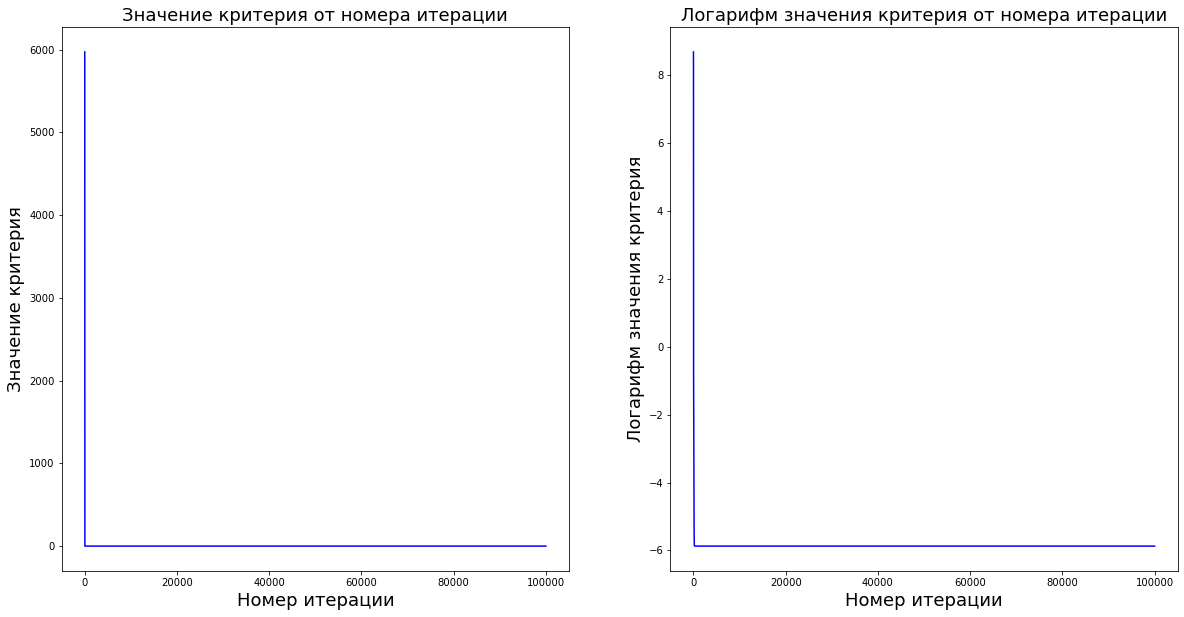

In [756]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
iterations = np.array(range(len(errors)))

ax[0].plot(iterations, errors, color = 'blue')
ax[0].set_title('Значение критерия от номера итерации', fontsize = 18)
ax[0].set_xlabel('Номер итерации', fontsize = 18)
ax[0].set_ylabel('Значение критерия', fontsize = 18)

ax[1].plot(iterations, np.log(errors), color = 'blue')
ax[1].set_title('Логарифм значения критерия от номера итерации', fontsize = 18)
ax[1].set_xlabel('Номер итерации', fontsize = 18)
ax[1].set_ylabel('Логарифм значения критерия', fontsize = 18)

plt.show()

Как видно, наш метод не работает из-за того, что значение задачи бесконечность, так как существует $\overline{x}$ такой, что
$A\overline{x} = 0$, при этом $b^T \overline{x}$ не равно нулю (если $b$ и $\overline{x}$ не перпендикулярны), тогда взяв $\lambda \overline{x}$  и устремив $\lambda$ к бесконечности, получим бесконечность.

Отдельно рассмотрим случай, когда $b$ и $\overline{x}$ перпендикулярны, в таком случае будет не одно решение.

__ж.в.2)__

In [757]:
d = 10
mu = 0
L = 1000
iteration = 10**5

s = 2
np.random.seed(s)
A = gen_matrix(d, mu, L, s)
b = np.zeros(d)
x_0 = np.random.sample(d) * 100

In [758]:
#Моё решение
x_my, errors = gradient_descent(grad_f, x_0, 1./L, iteration, f, 2)

print('Мое решение')
print(np.round(x_my, 3))
print(np.round(f(np.round(x_my, 3)), 3))

print()

print('Ошибка')
print(np.round(errors[- 1], 13))

Мое решение
[ 35.451   3.32   -1.923  17.453 -21.535  -0.893  14.79   -9.615  -7.032
 -20.259]
0.002

Ошибка
9.69583e-08


__ж.г.2)__

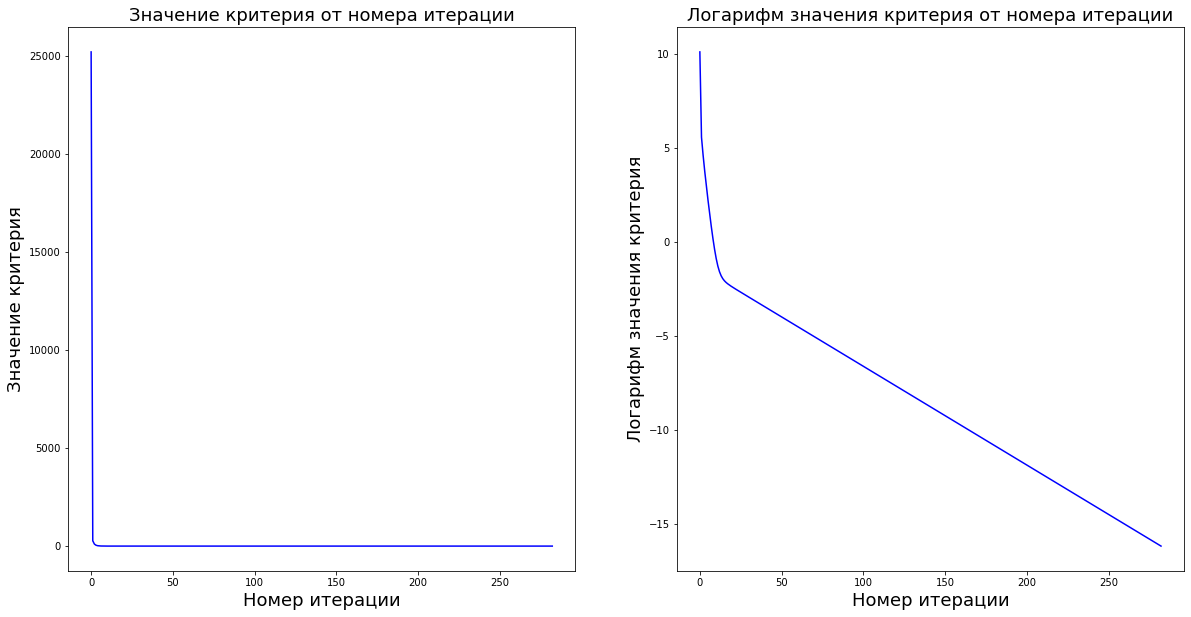

In [759]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
iterations = np.array(range(len(errors)))

ax[0].plot(iterations, errors, color = 'blue')
ax[0].set_title('Значение критерия от номера итерации', fontsize = 18)
ax[0].set_xlabel('Номер итерации', fontsize = 18)
ax[0].set_ylabel('Значение критерия', fontsize = 18)

ax[1].plot(iterations, np.log(errors), color = 'blue')
ax[1].set_title('Логарифм значения критерия от номера итерации', fontsize = 18)
ax[1].set_xlabel('Номер итерации', fontsize = 18)
ax[1].set_ylabel('Логарифм значения критерия', fontsize = 18)

plt.show()

В данном случае метод работает - мы нашли какое-то решение.

Создадим положительно определенную матрицу $A$, из нее сделаем положительно полуопределнную матрицу, а вектор $b$ возьмем с помощью заранее сгенерированно решения.

__ж.в.3)__

In [760]:
d = 10
mu = 10
L = 100
iteration = 10**5

s = 2
np.random.seed(s)
A = gen_matrix(d, mu, L, s)
b = np.random.sample(d) * 100
x_0 = np.random.sample(d) * 100

#Точное решение
x_np = np.linalg.inv(A) @ b

# переделаем матрицу A
A = A - mu * np.eye(d)
b = A @ x_np

print()

#Моё решение
x_my, errors_1 = gradient_descent(grad_f, x_0, 1./L, iteration, f, 0, x_np)

print('||x^k - x^*||^2')
print(np.round(x_my, 3))
print(np.round(f(np.round(x_my, 3)), 3))

print()

print('Ошибка')
print(np.round(errors_1[- 1], 13))

print()

x_my, errors_2 = gradient_descent(grad_f, x_0, 1./L, iteration, f, q, x_np)

print('f(x^k) - f(x^*)')
print(np.round(x_my, 3))
print(np.round(f(np.round(x_my, 3)), 3))

print()

print('Ошибка')
print(np.round(errors_2[- 1], 13))


||x^k - x^*||^2
[12.482  1.06  -0.604  5.949 -7.378  1.188  5.294 -2.657 -0.183 -6.178]
-160.709

Ошибка
153.9450510380166

f(x^k) - f(x^*)
[12.486  1.054 -0.6    5.95  -7.379  1.193  5.288 -2.66  -0.177 -6.176]
-160.709

Ошибка
9.94826e-08


__ж.г.2)__

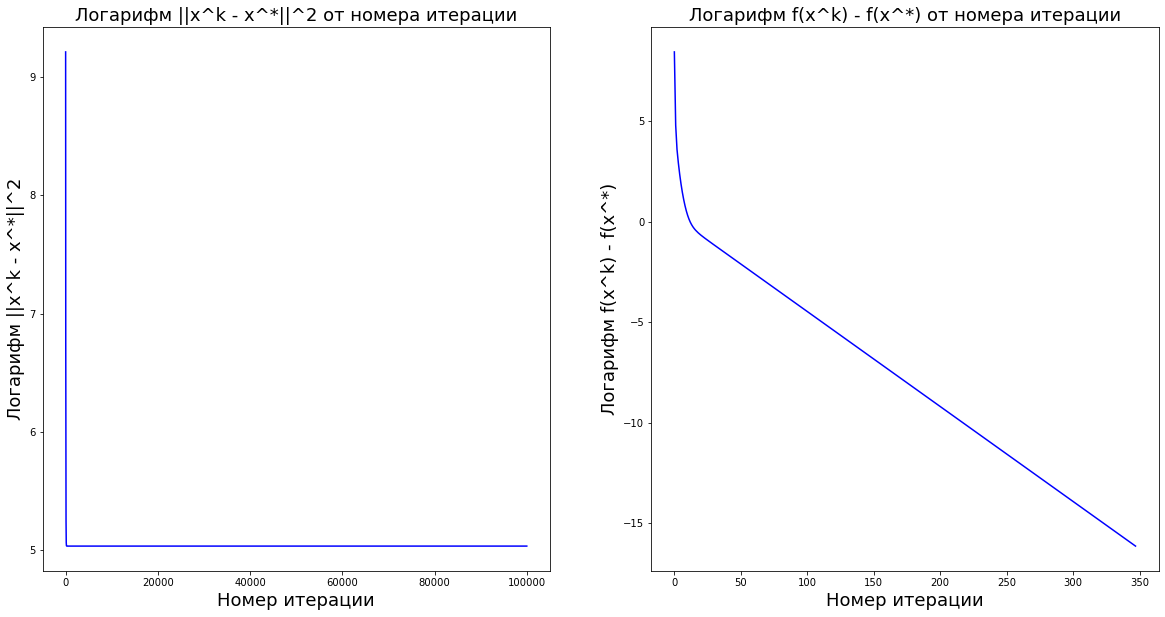

In [761]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))

iterations = np.array(range(len(errors_1)))
ax[0].plot(iterations, np.log(errors_1), color = 'blue')
ax[0].set_title('Логарифм ||x^k - x^*||^2 от номера итерации', fontsize = 18)
ax[0].set_xlabel('Номер итерации', fontsize = 18)
ax[0].set_ylabel('Логарифм ||x^k - x^*||^2', fontsize = 18)

iterations = np.array(range(len(errors_2)))
ax[1].plot(iterations, np.log(errors_2), color = 'blue')
ax[1].set_title('Логарифм f(x^k) - f(x^*) от номера итерации', fontsize = 18)
ax[1].set_xlabel('Номер итерации', fontsize = 18)
ax[1].set_ylabel('Логарифм f(x^k) - f(x^*)', fontsize = 18)

plt.show()

Как видно, по одному критерию есть сходимость, а по другому нет.

__(з)__ Все ли получилось в предыдущем пункте? Если нет, то поясните почему (если это еще не сделано в выводах прошлого пункта). Проделайте пункты (в)-(e), но с критерием сходимости $f(x_k) - f(x^*)$ и/или $f(\bar x_k) - f(x^*)$ (здесь $\bar x_k$ - средняя точка на текущей и предыдущих итерациях). Сделайте вывод.

__з.в)__

In [762]:
d = 10
mu = 1
L = 100
iteration = 10**4

s = 2
np.random.seed(s)
A = gen_matrix(d, mu, L, s)
b = np.random.sample(d) * 100
x_0 = np.random.sample(d) * 100

Так как функция сильно выпуклая, то для нахождения решения приравняем градиент к нулю, то есть:

$$\frac{1}{2} \left(A + A^T \right)x^* - b = 0$$

Так как $A$ мы взяли симметричную, то:

$$x^* = A^{-1}b$$

In [763]:
#Точное решение
x_np = np.linalg.inv(A) @ b
print('Решение numpy')
print(np.round(x_np, 3))
print(np.round(f(np.round(x_np, 3)), 3))

print()

#Моё решение
x_my, errors = gradient_descent(grad_f, x_0, 1./L, iteration, f, 1, x_np)

print('Мое решение')
print(np.round(x_my, 3))
print(np.round(f(np.round(x_my, 3)), 3))

print()

print('Ошибка')
print(np.round(errors[- 1], 13))

Решение numpy
[ 37.386   1.492  -0.809  17.557 -22.254   1.909  13.527  -9.68   -2.865
 -18.889]
-1657.543

Мое решение
[ 37.386   1.492  -0.809  17.557 -22.254   1.909  13.527  -9.68   -2.865
 -18.889]
-1657.543

Ошибка
9.80808e-08


__з.г)__

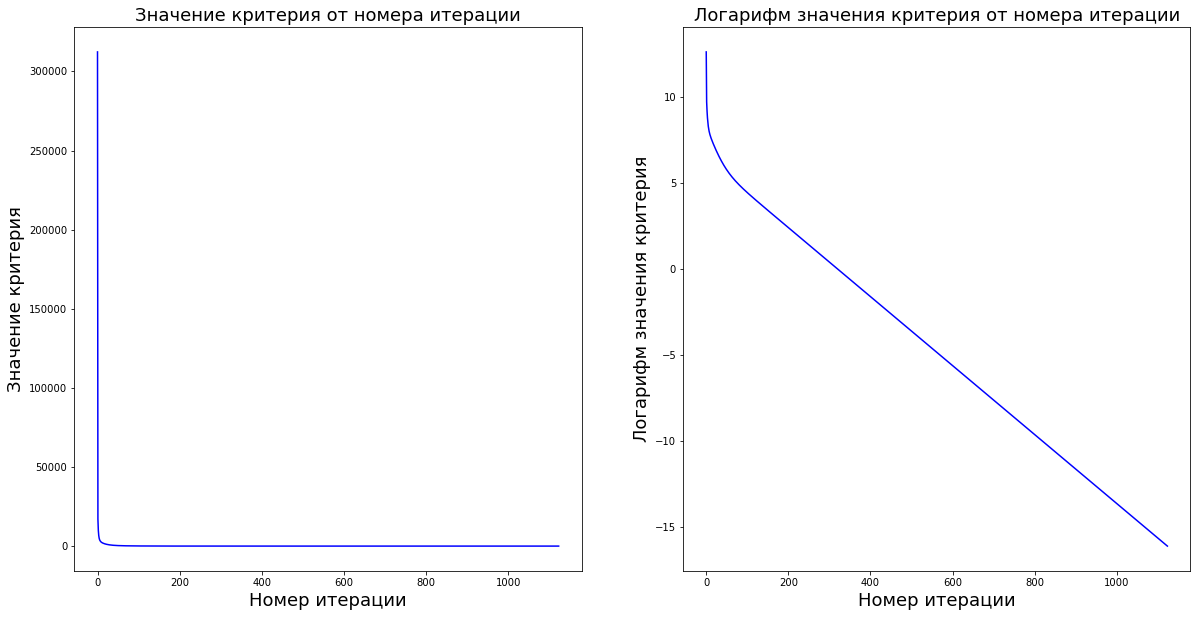

In [764]:
fig, ax = plt.subplots(1, 2, figsize = (20, 10))
iterations = np.array(range(len(errors)))

ax[0].plot(iterations, errors, color = 'blue')
ax[0].set_title('Значение критерия от номера итерации', fontsize = 18)
ax[0].set_xlabel('Номер итерации', fontsize = 18)
ax[0].set_ylabel('Значение критерия', fontsize = 18)

ax[1].plot(iterations, np.log(errors), color = 'blue')
ax[1].set_title('Логарифм значения критерия от номера итерации', fontsize = 18)
ax[1].set_xlabel('Номер итерации', fontsize = 18)
ax[1].set_ylabel('Логарифм значения критерия', fontsize = 18)

plt.show()

Скорость схоимости нашего метода линейная.

__з.д)__

Теоретическая сфходимость вылядит так:

$$f(x^k) - f(x^*) \leq  \left(1 - \frac{\mu}{L} \right)^k (f(x^0) - f(x^*))$$

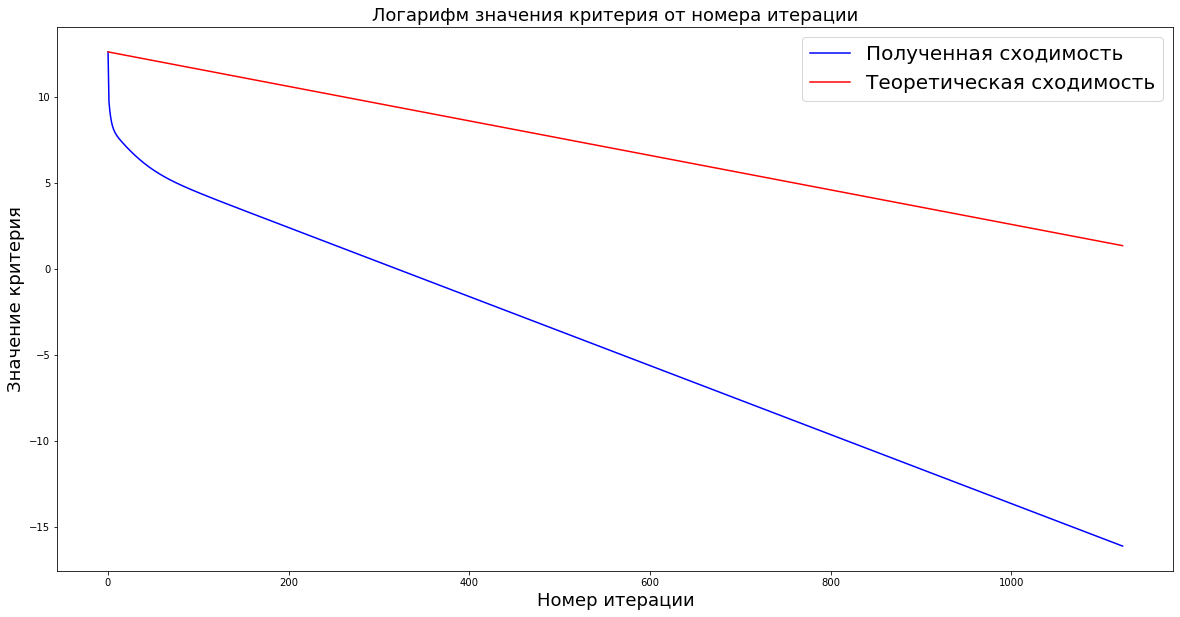

In [765]:
plt.figure(figsize = (20, 10))

plt.plot(iterations, np.log(errors), color = 'blue', label = 'Полученная сходимость')

C = f(x_0) - f(x_np)
q = (1 - mu/L)
result = []
result.append(C)
for k in range(1, len(iterations)):
    result.append(result[k - 1] * q)

plt.plot(iterations, np.log(result), color = 'red', label = 'Теоретическая сходимость')

plt.title("Логарифм значения критерия от номера итерации", fontsize = 18)
plt.xlabel("Номер итерации", fontsize = 18)
plt.ylabel("Значение критерия", fontsize = 18)

plt.legend(fontsize = 20)
plt.show()

Полученная сходимость получилась меньше теоретической, а прямые получились почти параллельными.

__з.е)__

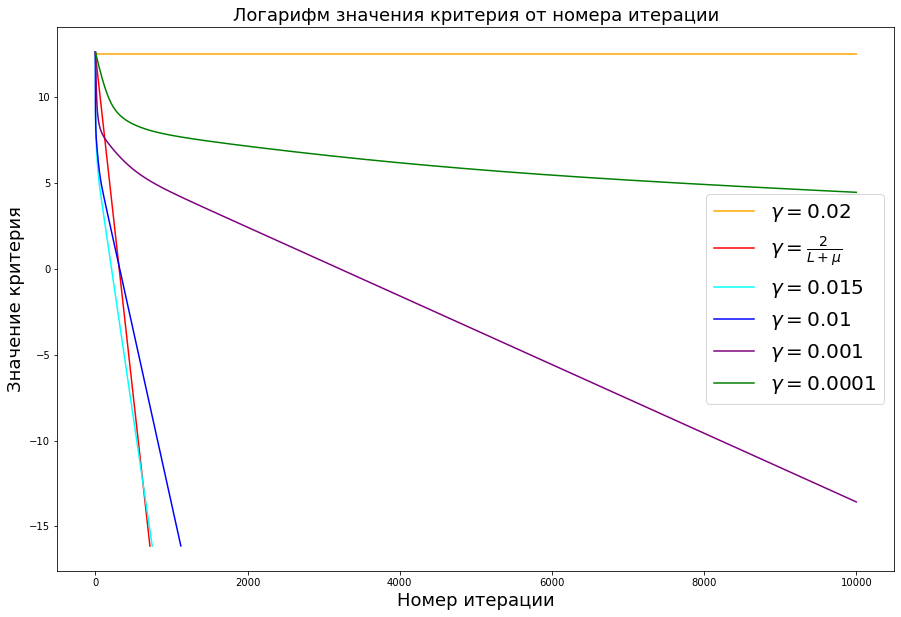

In [766]:
plt.figure(figsize = (15, 10))

x_my, errors = gradient_descent(grad_f, x_0, 0.02, iteration, f, 1, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'orange', label = r'$\gamma = 0.02$')

x_my, errors = gradient_descent(grad_f, x_0, 2/(L + mu), iteration, f, 1, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'red', label = r'$\gamma = \frac{2}{L + \mu}$')

x_my, errors = gradient_descent(grad_f, x_0, 0.015, iteration, f, 1, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'cyan', label = r'$\gamma = 0.015$')

x_my, errors = gradient_descent(grad_f, x_0, 0.01, iteration, f, 1, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'blue', label = r'$\gamma = 0.01$')

x_my, errors = gradient_descent(grad_f, x_0, 0.001, iteration, f, 1, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'purple', label = r'$\gamma = 0.001$')

x_my, errors = gradient_descent(grad_f, x_0, 0.0001, iteration, f, 1, x_np)
iterations = np.array(range(len(errors)))
plt.plot(iterations, np.log(errors), color = 'green', label = r'$\gamma = 0.0001$')

plt.title("Логарифм значения критерия от номера итерации", fontsize = 18)
plt.xlabel("Номер итерации", fontsize = 18)
plt.ylabel("Значение критерия", fontsize = 18)

plt.legend(fontsize = 20)
plt.show()

Как можно заметить, критерии эквиваленты.

__Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

In [11]:
#ответ